In [1]:
# Importation des modules
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# Creation de la dataframe projet_df
projet_df = pd.DataFrame({
        'code' : [10, 20, 30, 40, 50],
        'nom' : ['PUMA', 'GOANA', 'ACACIA', 'MIROR', 'BRT'],
        'budget' : [125000000, 5000000000, 300000000, 25000000, 44000000000],
        'dateDebut' : ['12/11/2013', '06/05/2007', '20/02/2006', '31/03/2013', '11/10/2019'],
        'region' : ['Ziguinchor', 'Diourbel', 'Kaolack', np.NaN, 'Dakar']
})
projet_df['dateDebut'] = pd.to_datetime(projet_df['dateDebut'], format = '%d/%m/%Y') # conversion de la colonne dateDebut en date

In [5]:
engine = create_engine('mysql+pymysql://root@localhost/projets') # Connection a la base de donnes

In [ ]:
# Exportation du dataframe projet_df vers la table projet de la base données projets
projet_df.to_sql('projet', index = False, con = engine, if_exists = 'append')

In [7]:
# Importation des données du fichier vers un dataframe employe_df
employe_df = pd.read_excel('Employes.xlsx', index_col = 'num')
print(f"Le format du dataframe importé est {employe_df.shape}") # format (nombres de ligne et de colonnes) du dataframe importé
print(f"Le dataframe importé conmporte alors {employe_df.shape[0]} lignes et {employe_df.shape[1]} colonnes")

Le format du dataframe importé est (16, 9)
Le dataframe importé conmporte alors 16 lignes et 9 colonnes


In [ ]:
# Exportation des données du dataframe employe_df vers la table Employe de la base de données
employe_df['dateEmbauche'] = pd.to_datetime(employe_df['dateEmbauche'], format = '%d/%m/%Y') # conversion de la colonne 'dateEmbauche en date'
employe_df.index.name = 'numero' # renome le nom de l'index en 'numero comme dans la base de donnee' pour eviter les erreurs de type pymysql.err.OperationalError
filtred_df = employe_df[employe_df['projet'] != 60] # On filtre les donnees pour n'avoir que les donnees dont le code 'projet' est reference dans la table 'projet' afin d'eviter les erreurs d'integrites
filtred_df.to_sql('employe', index = True, con = engine, if_exists = 'append') # On exporte les donnes filtrees dans la base de donnees

In [9]:
# Affichage des noms, prénoms, âges, professions des employés habitant à Fass
rqt = "SELECT nom, prenom, age, profession FROM employe WHERE adresse = 'Fass'"
rslts = pd.read_sql(rqt, engine)
print("Liste des personnes habitant a Fass : ")
print(rslts)

Liste des personnes habitant a Fass : 
     nom       prenom  age  profession
0  DIOUF  Papa Amadou   55  Comptable 
1   FALL  Ndèye Fatou   48  Sécretaire
2   HANE    Mahamadou   49  Comptable 


In [11]:
# Affichage des salaires moyens par profession
rqt = "SELECT profession, AVG(salaire) AS 'salaire moyen' FROM `employe` GROUP BY profession"
rslts = pd.read_sql(rqt, engine)
print("Liste des salaires moyens par profession : ")
print(rslts)

Liste des salaires moyens par profession : 
       profession  salaire moyen
0     Commercial        300000.0
1      Comptable        700000.0
2   Gestionnaire        850000.0
3  Informaticien       1100000.0
4      Sécretaire       210000.0
5     Technicien       1400000.0


In [13]:
# Afficher des projets où travaillent des informaticiens
rqt = "SELECT projet.nom FROM projet JOIN employe ON projet.code = employe.projet WHERE employe.profession = 'Informaticien'"
rslts = pd.read_sql(rqt, engine)
print("Le ou les projets où travaillent des informaticiens sont : ", end = " ")
print(','.join(rslts['nom'].tolist()))

Le ou les projets où travaillent des informaticiens sont :  PUMA


In [15]:
# Affichage des salires et ages moyens des employes pour chaque projets
rqt = "SELECT p.nom, CONVERT(AVG(e.salaire), float) AS 'Salaire moyen', CONVERT(AVG(e.age), INTEGER) AS 'Age moyen' FROM projet AS p JOIN employe AS e ON p.code = e.projet GROUP BY p.code"
rslts = pd.read_sql(rqt, engine)
print("Liste des salires et ages moyens des employes pour chaque projets : ")
print(rslts)

Liste des salires et ages moyens des employes pour chaque projets : 
      nom  Salaire moyen  Age moyen
0    PUMA       566667.0         33
1   GOANA       850000.0         35
2  ACACIA      1050000.0         40
3   MIROR       465000.0         34
4     BRT       600000.0         25


In [17]:
# Se connecter au serveur MySQL et charger les données des tables employe et projet dans des dataframes pandas
engine = create_engine('mysql+pymysql://root@localhost/projets')
projet_df = pd.read_sql("SELECT * FROM projet", engine)
employe_df = pd.read_sql("SELECT * FROM employe", engine)

In [19]:
# Les formats (nombres de ligne et de colonnes) des dataframes importés.
print(f"Le format du dataframe 'projet' importé est de {projet_df.shape[0]} lignes et {projet_df.shape[1]} colonnes")
print(f"Le format du dataframe 'employe' importé est de {employe_df.shape[0]} lignes et {employe_df.shape[1]} colonnes")

Le format du dataframe 'projet' importé est de 5 lignes et 5 colonnes
Le format du dataframe 'employe' importé est de 12 lignes et 10 colonnes


In [21]:
# Verification si les dataframes 'projet et employe' comporte des valeurs manquantes avec la methode 'isna' qui creera un Dataframe booleen de la meme taille que projet puis appliquer la methode 'any' deux fois afin d'obtennir un booleen
print("Le dataframe 'projet' comporte au moins une valeur manquante" if projet_df.isna().any().any() else "Le dataframe 'projet' ne comporte pas de valeurs manquantes")
print("Le dataframe 'employe' comporte au moins une valeur manquante" if employe_df.isna().any().any() else "Le dataframe 'employe' ne comporte pas de valeurs manquantes")

Le dataframe 'projet' comporte au moins une valeur manquante
Le dataframe 'employe' comporte au moins une valeur manquante


In [23]:
print("Affichage du dataframe 'projet' avant nettoyage : ")
display(projet_df) # La valeur manquante concerne uniquement un enregistrement et est au niveau de la colonne 'region'; donc on opte pour une supression de cette enregistrement
projet_df = projet_df.dropna()
print("Affichage du dataframe 'projet' apres nettoyage : ")
display(projet_df)

Affichage du dataframe 'projet' avant nettoyage : 


,code,nom,budget,dateDebut,region
0,10,PUMA,125000000,2013-11-12,Ziguinchor
1,20,GOANA,5000000000,2007-05-06,Diourbel
2,30,ACACIA,300000000,2006-02-20,Kaolack
3,40,MIROR,25000000,2013-03-31,None
4,50,BRT,44000000000,2019-10-11,Dakar


Affichage du dataframe 'projet' apres nettoyage : 


,code,nom,budget,dateDebut,region
0,10,PUMA,125000000,2013-11-12,Ziguinchor
1,20,GOANA,5000000000,2007-05-06,Diourbel
2,30,ACACIA,300000000,2006-02-20,Kaolack
4,50,BRT,44000000000,2019-10-11,Dakar


In [25]:
print("Affichage du dataframe 'employe' avant nettoyage : ")
display(employe_df) # Les valeurs manquantes concernent plusieurs colonnes
employe_df = employe_df.dropna(subset = ['projet']) # On supprime les enregistrements qui ont une valeur manquante au niveau de la colonne 'projet'
employe_df['tel'] = employe_df['tel'].fillna('000000000') # On remplace les enregistrements qui on une valeur manquante au niveau de la colonne 'tel' par '000000000'
employe_df['adresse'] = employe_df['adresse'].fillna('Somewhere') # On remplace les enregistrements qui on une valeur manquante au niveau de la colonne 'adresse' par 'Somewhere'
print("Affichage du dataframe 'employe' apres nettoyage : ")
display(employe_df)

Affichage du dataframe 'employe' avant nettoyage : 


,numero,nom,prenom,adresse,age,dateEmbauche,tel,profession,salaire,projet
0,11,DIAHAME,Moussa,Fann Hock,20,2013-04-30,781234455,Commercial,300000,10.0
1,22,DIALLO,Mouhamadou Moustapha,Memoz,35,2013-05-21,778796656,Technicien,1400000,30.0
2,44,LY,Niassa,None,40,2006-02-20,None,Gestionnaire,850000,20.0
3,55,DIALLO,Abdou Rahmane,Fann Hock,23,2007-05-06,None,Informaticien,1100000,10.0
4,66,MBALLO,Alassane,Colobane,19,2013-04-01,None,Sécretaire,30000,40.0
5,88,DIOUF,Philippe Jordan,Colobane,45,2006-02-20,784532156,Comptable,700000,30.0
6,99,DIOUF,Papa Amadou,Fass,55,2007-02-20,None,Comptable,300000,10.0
7,101,FALL,Ndèye Fatou,Fass,48,2019-10-11,None,Sécretaire,300000,NaN
8,303,DIOP,Awa,None,29,2019-12-11,767891023,Gestionnaire,850000,20.0
9,404,HANE,Mahamadou,Fass,49,2006-02-20,None,Comptable,900000,40.0


Affichage du dataframe 'employe' apres nettoyage : 


,numero,nom,prenom,adresse,age,dateEmbauche,tel,profession,salaire,projet
0,11,DIAHAME,Moussa,Fann Hock,20,2013-04-30,781234455,Commercial,300000,10.0
1,22,DIALLO,Mouhamadou Moustapha,Memoz,35,2013-05-21,778796656,Technicien,1400000,30.0
2,44,LY,Niassa,Somewhere,40,2006-02-20,000000000,Gestionnaire,850000,20.0
3,55,DIALLO,Abdou Rahmane,Fann Hock,23,2007-05-06,000000000,Informaticien,1100000,10.0
4,66,MBALLO,Alassane,Colobane,19,2013-04-01,000000000,Sécretaire,30000,40.0
5,88,DIOUF,Philippe Jordan,Colobane,45,2006-02-20,784532156,Comptable,700000,30.0
6,99,DIOUF,Papa Amadou,Fass,55,2007-02-20,000000000,Comptable,300000,10.0
8,303,DIOP,Awa,Somewhere,29,2019-12-11,767891023,Gestionnaire,850000,20.0
9,404,HANE,Mahamadou,Fass,49,2006-02-20,000000000,Comptable,900000,40.0
10,505,LO,Mariama,Mermoz,19,2014-04-25,000000000,Sécretaire,300000,50.0


In [27]:
# Creation des dataframes
# Noms et prénom des employés
noms_complets = employe_df[['nom', 'prenom']]
display(noms_complets)

,nom,prenom
0,DIAHAME,Moussa
1,DIALLO,Mouhamadou Moustapha
2,LY,Niassa
3,DIALLO,Abdou Rahmane
4,MBALLO,Alassane
5,DIOUF,Philippe Jordan
6,DIOUF,Papa Amadou
8,DIOP,Awa
9,HANE,Mahamadou
10,LO,Mariama


In [29]:
# Noms et prénom des employés, ordre croissant selon le nom
noms_complets_tries = noms_complets.sort_values('nom', ascending = True)
display(noms_complets_tries)

,nom,prenom
0,DIAHAME,Moussa
1,DIALLO,Mouhamadou Moustapha
3,DIALLO,Abdou Rahmane
8,DIOP,Awa
11,DIOP,Ndèye Awa
5,DIOUF,Philippe Jordan
6,DIOUF,Papa Amadou
9,HANE,Mahamadou
10,LO,Mariama
2,LY,Niassa


In [31]:
# Noms et prénom des employés de moins 25 ans, ordre croissant selon le nom
noms_complets_moins_25 = employe_df[employe_df['age'] >= 25].loc[:, ['nom', 'prenom']].sort_values('nom', ascending = True)
display(noms_complets_moins_25)

,nom,prenom
1,DIALLO,Mouhamadou Moustapha
8,DIOP,Awa
11,DIOP,Ndèye Awa
5,DIOUF,Philippe Jordan
6,DIOUF,Papa Amadou
9,HANE,Mahamadou
2,LY,Niassa


In [33]:
# Nom, budget, date de début et localisation des projets
infos_projets = projet_df.iloc[:, 1:]
display(infos_projets)

,nom,budget,dateDebut,region
0,PUMA,125000000,2013-11-12,Ziguinchor
1,GOANA,5000000000,2007-05-06,Diourbel
2,ACACIA,300000000,2006-02-20,Kaolack
4,BRT,44000000000,2019-10-11,Dakar


In [35]:
# Nom, budget, date de début et localisation des projets de Kaolack
infos_projets_Kaolack = infos_projets[infos_projets['region'] == 'Kaolack']
display(infos_projets_Kaolack)

,nom,budget,dateDebut,region
2,ACACIA,300000000,2006-02-20,Kaolack


In [37]:
# Nom, budget, date de début et localisation des projets de Kaolack et Dakar
infos_projets_Kaolack_Dakar = infos_projets[(infos_projets['region'] == 'Kaolack') | (infos_projets['region'] == 'Dakar')]
display(infos_projets_Kaolack_Dakar)

,nom,budget,dateDebut,region
2,ACACIA,300000000,2006-02-20,Kaolack
4,BRT,44000000000,2019-10-11,Dakar


In [39]:
# Professions et salaires des employés en commençant par les salaires les plus élevés
professions_et_salaires_triees = employe_df[['profession', 'salaire']].sort_values('salaire', ascending = False)
display(professions_et_salaires_triees)

,profession,salaire
1,Technicien,1400000
3,Informaticien,1100000
9,Comptable,900000
11,Comptable,900000
2,Gestionnaire,850000
8,Gestionnaire,850000
5,Comptable,700000
0,Commercial,300000
6,Comptable,300000
10,Sécretaire,300000


In [41]:
# Noms, prénoms et salaires annuels des employés avec les budgets de leurs projets
employe_df_renomme = employe_df.rename(columns = {'projet': 'code'}) # On renomme la colonne 'projet' en 'code' du dataframe 'employe' afin d'avoir une cle en commun pour pouvoir faire la jointure
df_joint = pd.merge(employe_df_renomme, projet_df, on = 'code') # On joint les deux dataframes
infos_employes_projets = df_joint[['nom_x', 'prenom', 'salaire', 'budget']] # On selectionne les noms, prenoms et salaires des employes avec les budgets de leurs projets
infos_employes_projets = infos_employes_projets.rename(columns = {'nom_x': 'nom', 'budget': 'budget projet'}) # On renomme la colonne 'nom_x' generer automatiquement par pandas a cause de la presence de deux 'nom' identiques entre les deux datafranes en 'nom'
display(infos_employes_projets)

,nom,prenom,salaire,budget projet
0,DIAHAME,Moussa,300000,125000000
1,DIALLO,Abdou Rahmane,1100000,125000000
2,DIOUF,Papa Amadou,300000,125000000
3,DIALLO,Mouhamadou Moustapha,1400000,300000000
4,DIOUF,Philippe Jordan,700000,300000000
5,LY,Niassa,850000,5000000000
6,DIOP,Awa,850000,5000000000
7,LO,Mariama,300000,44000000000
8,DIOP,Ndèye Awa,900000,44000000000


In [43]:
# Noms, prénoms et salaires augmentés de 20% des employés
infos_employes_salaires_augmentees = employe_df[['nom', 'prenom', 'salaire']]
infos_employes_salaires_augmentees.loc[:, 'salaire'] += infos_employes_salaires_augmentees['salaire'] * 0.2 # On utilise .loc pour eviter un message d'avertissement en raison du copie
display(infos_employes_salaires_augmentees)

,nom,prenom,salaire
0,DIAHAME,Moussa,360000
1,DIALLO,Mouhamadou Moustapha,1680000
2,LY,Niassa,1020000
3,DIALLO,Abdou Rahmane,1320000
4,MBALLO,Alassane,36000
5,DIOUF,Philippe Jordan,840000
6,DIOUF,Papa Amadou,360000
8,DIOP,Awa,1020000
9,HANE,Mahamadou,1080000
10,LO,Mariama,360000


In [45]:
# Montant total des salaires de tous les employés
montant_total_salaires = pd.DataFrame({
    'Montant Total des salaires': [infos_employes_salaires_augmentees['salaire'].sum()]
})
display(montant_total_salaires)

,Montant Total des salaires
0,9156000


In [47]:
# Budget moyen des projets
budget_moyen_projets = pd.DataFrame({
    'Bidget Moyen des projets': [f"{projet_df['budget'].mean():.2f}"] # On le format pour ne pas l'avoir sous format scientifique(exposant)
})
display(budget_moyen_projets)

,Bidget Moyen des projets
0,12356250000.00


In [49]:
# Salaires le plus petit et le plus élevé
min_max_salaire = pd.DataFrame({
    'Plus petit salaire': [employe_df['salaire'].min()],
    'Plus eleve salaire': [employe_df['salaire'].max()]
})
display(min_max_salaire)

,Plus petit salaire,Plus eleve salaire
0,30000,1400000


In [51]:
# Salaire moyen par projet
# On utilisera le dataframe fusionne 'df_joint'
salaire_moyen_par_projet = df_joint.groupby('nom_y')['salaire'].mean().reset_index() # On utilise groupby pour regrouper les projet par nom puis calculer la moyenne sur les salaires. reset_index permet de convertir les groupes en colonnes
salaire_moyen_par_projet['salaire'] = salaire_moyen_par_projet['salaire'].apply(lambda x: f"{x:.2f}") # On utilise une fonction lambad pour formater chaque valeur de la serie en floatant a l'aide de la fonction apply
salaire_moyen_par_projet.columns = ['Projet', 'Salaire moyen'] # On renomme les colonnes
display(salaire_moyen_par_projet)

,Projet,Salaire moyen
0,ACACIA,1050000.00
1,BRT,600000.00
2,GOANA,850000.00
3,PUMA,566666.67


In [53]:
# Ages moyens des employés par profession
# Meme demarche que precedent
ages_moyens_par_profession = employe_df.groupby('profession')['age'].mean().reset_index()
ages_moyens_par_profession['age'] = ages_moyens_par_profession['age'].apply(int)
ages_moyens_par_profession.columns = ['Profession', 'Age moyen']
display(ages_moyens_par_profession)

,Profession,Age moyen
0,Commercial,20
1,Comptable,44
2,Gestionnaire,34
3,Informaticien,23
4,Sécretaire,19
5,Technicien,35


In [55]:
# Salaire moyen par projet et par profession des projets localisés à Dakar, ou à Kaolack ou à Ziguinchor
# On utilisera le dataframe fusionne 'df_joint'
# Sur les donnees qui nous on ete fournies, les adresses sont tous localisees a Dakar ou elles ne sont pas indiquees; donc on ne selectionnera pas a apres les donnees dont l'adresse est indiquee en 'Somewhere'
salaire_moyen_par_projet_profession_DKKLZG = df_joint.groupby(['nom_y', 'profession', 'adresse'])['salaire'].mean().reset_index() # On regroupe par le nom du projet ('nom_y'), 'profession' et adresse en passant a la fonction groupby une liste
salaire_moyen_par_projet_profession_DKKLZG = salaire_moyen_par_projet_profession_DKKLZG[salaire_moyen_par_projet_profession_DKKLZG['adresse'] != 'Somewhere']
display(salaire_moyen_par_projet_profession_DKKLZG)

,nom_y,profession,adresse,salaire
0,ACACIA,Comptable,Colobane,700000.0
1,ACACIA,Technicien,Memoz,1400000.0
2,BRT,Comptable,Fann Hock,900000.0
3,BRT,Sécretaire,Mermoz,300000.0
5,PUMA,Commercial,Fann Hock,300000.0
6,PUMA,Comptable,Fass,300000.0
7,PUMA,Informaticien,Fann Hock,1100000.0


In [57]:
# Sauvegarde sur Excel
from os import makedirs
makedirs('resultats', exist_ok = True) # Creeation du dossier 'resultats'
def sauvegarde_vers_excel(list_dfs, list_nomfichiers) : # Implementation d'une fonction pour sauvegarder les dataframes precedentes dans un fichier excel
    for df, nomfichier in zip(list_dfs, list_nomfichiers) : # On utilise zip pour iterer sur les deux listes a la fois
        chemin = f"resultats/{nomfichier}.xlsx"
        df.to_excel(chemin, index = False, engine = 'openpyxl')
list_dfs = [noms_complets, noms_complets_tries, noms_complets_tries, infos_projets, infos_projets_Kaolack, infos_projets_Kaolack_Dakar, professions_et_salaires_triees, infos_employes_projets, infos_employes_salaires_augmentees, montant_total_salaires, budget_moyen_projets, min_max_salaire, salaire_moyen_par_projet, ages_moyens_par_profession, salaire_moyen_par_projet_profession_DKKLZG]
list_nomfichiers = ['noms_complets', 'noms_complets_tries', 'noms_complets_tries', 'infos_projets', 'infos_projets_Kaolack', 'infos_projets_Kaolack_Dakar', 'professions_et_salaires_triees', 'infos_employes_projets', 'infos_employes_salaires_augmentees', 'montant_total_salaires', 'budget_moyen_projets', 'min_max_salaire', 'salaire_moyen_par_projet', 'ages_moyens_par_profession', 'salaire_moyen_par_projet_profession_DKKLZG']
sauvegarde_vers_excel(list_dfs, list_nomfichiers)

In [59]:
# Visualisation des données
import seaborn as sns # Importation des modules pour visualiser
import matplotlib.pyplot as plt

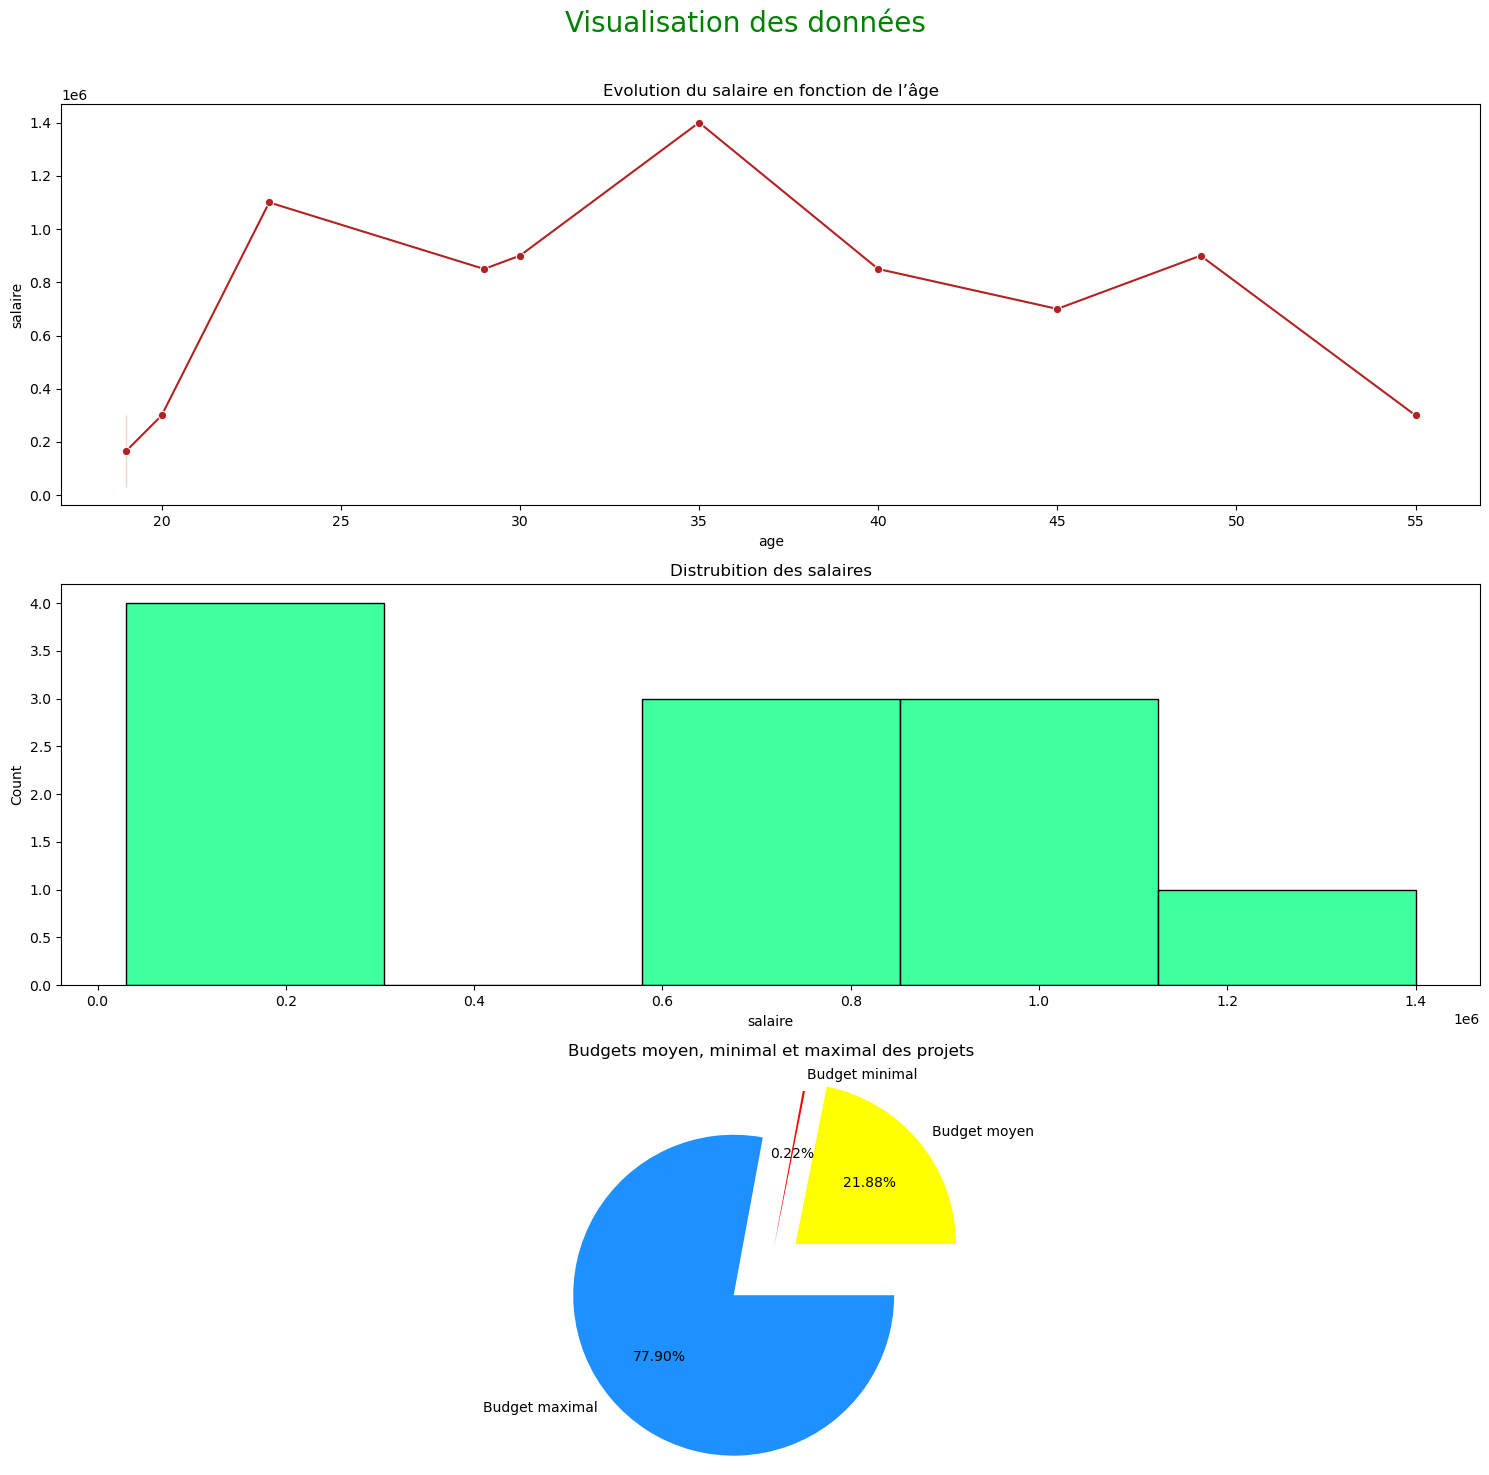

In [125]:
fig, graphes = plt.subplots(3, figsize = (15, 15))
fig.suptitle("Visualisation des données", fontsize = 20, color = 'green')
# Premiere graphe
graphes[0] = sns.lineplot(x = 'age', y = 'salaire', data = employe_df, color = 'firebrick',  marker = 'o', ax = graphes[0])
graphes[0].set_title("Evolution du salaire en fonction de l’âge")

# Deuxieme graphe
graphes[1] = sns.histplot(x = 'salaire', data = employe_df, color = 'springgreen', ax = graphes[1])
graphes[1].set_title("Distrubition des salaires")

# Troisieme graphe
graphes[2].pie([np.mean(projet_df['budget']), np.min(projet_df['budget']), np.max(projet_df['budget'])], 
                     labels = ['Budget moyen', 'Budget minimal', 'Budget maximal'],
                    colors = ['yellow', 'red', 'dodgerblue'], autopct ='%.2f%%', explode = [0.2, 0.1, 0.3])
graphes[2].set(title = "Budgets moyen, minimal et maximal des projets")

# Affichage des graphes
plt.tight_layout(rect = [0, 0, 1, 0.97])
plt.show()